In [13]:
# !pip install biopython pandas matplotlib seaborn if not already downloaded

In [4]:
import pandas, matplotlib, seaborn

In [5]:
from Bio import SeqIO

In [7]:
fasta_file = "C:/Users/panos/Desktop/Bioifo_Projects/SRR33819363.fasta"

In [8]:
print(fasta_file)

C:/Users/panos/Desktop/Bioifo_Projects/SRR33819363.fasta


In [9]:
print(type(fasta_file))

<class 'str'>


In [22]:
records = list(SeqIO.parse(fasta_file, "fasta"))

In [25]:
# How to see the number of sequences

print(f"There are {len(records)} total sequences") 
# or
print(f"There are %i total sequences" % (len(records)))

There are 382324 total sequences
There are 382324 total sequences


In [34]:
# Let's inspect the first sequence 

records[0]

SeqRecord(seq=Seq('TCCCGAACTCCTACGGGAGGCAGCAGTAGGGAATCTTCGGCAATGGACGAAAGT...TCT'), id='SRR33819363.1', name='SRR33819363.1', description='SRR33819363.1 VH01349:218:AAGHLHNM5:1:1101:61726:1435 length=301', dbxrefs=[])

In [36]:
print("ID:", records[0].id)
print("NAME:", records[0].name)
print("DESCRIPTION:", records[0].description)
print("LENGTH:", f"This spot/read has a length of {len(records[0])} nucleotides" )

ID: SRR33819363.1
NAME: SRR33819363.1
DESCRIPTION: SRR33819363.1 VH01349:218:AAGHLHNM5:1:1101:61726:1435 length=301
LENGTH: This spot/read has a length of 301 nucleotides


In [59]:
# Random check that the lentgh of the sequences is the same on all reads/spots
# It should reflect a ~300nt sequence -> V3-V4 variable regions of the 16S rRNA gene
expected_length = len(records[0].seq)
rec_list = []
for rec in records: 
    if len(rec.seq) == expected_length:
        rec_list.append("True")
    else:
        rec_list.append("False")

print(f"> Number of reads/spots with exactly {expected_length} number of nucleotides: {rec_list.count("True")}")
print(f"> Number of reads/spots with number of nucleotides not equal to {expected_length} : {rec_list.count("False")}")

> Number of reads/spots with exactly 301 number of nucleotides: 382324
> Number of reads/spots with number of nucleotides not equal to 301 : 0


In [61]:
rec_list.count("True") == len(rec_list) 

# That means that every single read/spot had a length of 301 nucleotides
# No: 1) partial reads 2) adapter contamination 3) trimming issues

True

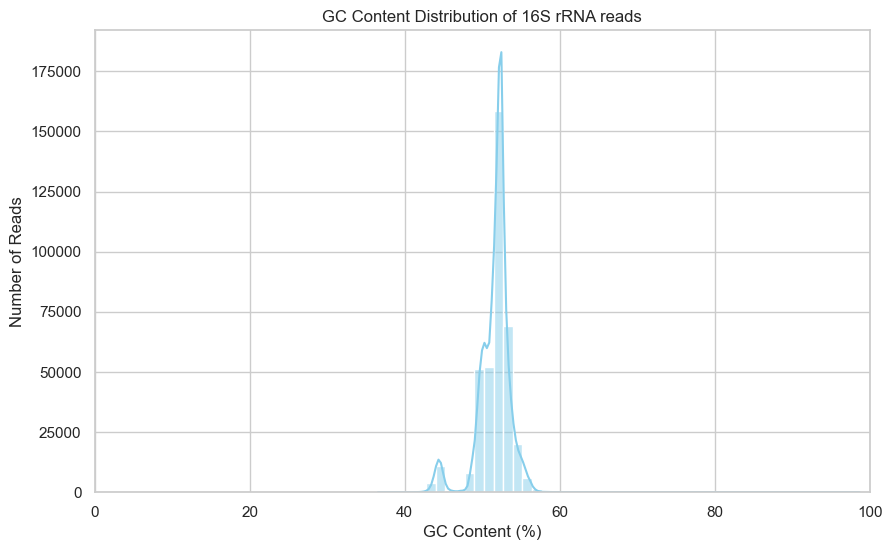

In [65]:
# Build a mini fastQC

def gc_content(sequence):
    seq = sequence.upper()
    gc_count = seq.count("G") + seq.count("C")
    gc_percentage = (gc_count/len(seq))*100
    return gc_percentage 

# Calculate the gc content in all reads

gc_values = [gc_content(rec.seq) for rec in records]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(gc_values, bins = 50, kde = True, color = "skyblue") # where kde -> creates a smooth density line 
plt.title("GC Content Distribution of 16S rRNA reads")
plt.xlabel("GC Content (%)")
plt.ylabel("Number of Reads")
plt.xlim(0, 100)

plt.show()

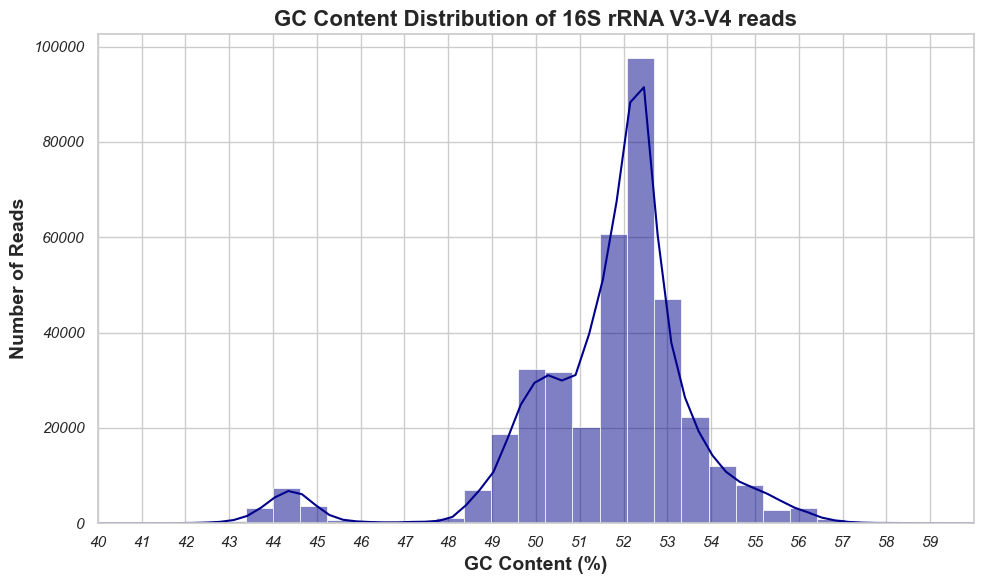

In [94]:
# Since the area of interest in the x-axis is between values 40 and 60 (GC Content (%)), we can zoom in on the plot

sns.set(style = "whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(gc_values, bins = 100, color = "darkblue", kde = True)

plt.title("GC Content Distribution of 16S rRNA V3-V4 reads", fontsize = 16, fontweight = "bold")
plt.xlabel("GC Content (%)", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of Reads",fontsize = 14, fontweight = "bold")

plt.xlim(40, 60)
import numpy as np
plt.xticks(np.arange(40, 60, 1))

plt.xticks(fontstyle = "italic")
plt.yticks(fontstyle = "italic")

plt.tight_layout()
plt.show()

In [82]:
# Explanation: 1) Different Bacterial Populations 2) PCR or sequencing biases: Sometimes PCR amplification can slightly favor 
#              sequences with specific GC content 3) Chimeras or partial ends: the secondary peak is smaller — consistent with 
#              minor sequence variants

In [95]:
# Check which reads/spots correspond to which of the three major peaks

peak_1 = []
peak_2 = []
peak_3 = []

for rec in records:
    if gc_content(rec.seq) <= 46:
        peak_1.append(rec.id)
    elif 49 <= gc_content(rec.seq) <= 51:
        peak_2.append(rec.id)
    else: 
        peak_3.append(rec.id)

print("Number of reads in peak_1:", len(peak_1))
print("Number of reads in peak_2:", len(peak_2))
print("Number of reads in peak_3:", len(peak_3))

Number of reads in peak_1: 15654
Number of reads in peak_2: 82903
Number of reads in peak_3: 283767


In [96]:
# Clearly, the biological sample is not homogeneous

In [103]:
peak_1[0]

'SRR33819363.13'

In [123]:
# Let's create a subset of ids

# For peak_1:

peak_1_records = []
i = 0
for rec in records:
    if rec.id == peak_1[i]:
        peak_1_records.append(rec)
    else:
        continue
    i += 1
    if i == len(peak_1):
        break

In [124]:
len(peak_1_records)

15654

In [125]:
# For peak_2: 

peak_2_records = []
i = 0
for rec in records:
    if rec.id == peak_2[i]:
        peak_2_records.append(rec)
    else:
        continue
    i += 1
    if i == len(peak_2):
        break

In [126]:
len(peak_2_records)

82903

In [127]:
# For peak_3: 

peak_3_records = []
i = 0
for rec in records:
    if rec.id == peak_3[i]:
        peak_3_records.append(rec)
    else:
        continue
    i += 1
    if i == len(peak_3):
        break

In [128]:
len(peak_3_records)

283767

In [147]:
# Create a subset of 5 random records

random.seed(42)

peak_1_subset = random.sample(peak_1_records, 5)
len(peak_1_subset)
print(peak_1_subset[0].seq)


ACCTAAACTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGAGGCAACTCTGAACCAGCCATGCCGCGTGCAGGATGACGGTCCTATGGATTGTAAACTGCTTTTGTACAGGAAGAAACCTCCCTACGTGTAGGGACTTGACGGTACTGTAAGAATAAGGATCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGATCCGAGCGTTATCCGGAATTATTGGGTTTAAAGGGTTCGTAGGCGGTTTGATAAGTCAGTGGTGAAATTTCTTAGCTTAACTAAGACACGGCCAG


In [156]:
from Bio.SeqIO import write

peak_1_subset = random.sample(peak_1_records, 5)
peak_2_subset = random.sample(peak_2_records, 5)
peak_3_subset = random.sample(peak_3_records, 5)

write(peak_1_subset, "peak_1_random5.fasta", "fasta")
write(peak_2_subset, "peak_2_random5.fasta", "fasta")
write(peak_3_subset, "peak_3_random5.fasta", "fasta")

5

In [1]:
# Visualize nucleotide BLAST results